In [1]:
import os
import glob

import cv2
import pandas as pd
import numpy as np
import math

import tensorflow as tf
from tqdm import tqdm_notebook as tqdm

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

c:\users\limxu\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\limxu\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\limxu\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\limxu\appd

## Extract video frames + generate predict df

In [2]:
cam = cv2.VideoCapture("C:\\Users\\limxu\\Documents\\Intern\\data\\test.mp4")

try: 
      
    # creating a folder named data 
    if not os.path.exists('C:\\Users\\limxu\\Documents\\Intern\\data\\test_images'): 
        os.makedirs('C:\\Users\\limxu\\Documents\\Intern\\data\\test_images') 
  
#if not created then raise error 
except OSError: 
    print ('Error: Creating directory of data')   

In [6]:
# frame 
currentframe = 0

#create empty dataframe to write as train_data.csv
column_names = ["image_path", "frame"]
test_df =  pd.DataFrame(columns = column_names)
  
while(True): 
      
    # reading from frame 
    ret,frame = cam.read() 
  
    if ret: 
        # if video is still left continue creating images 
        name = 'C:\\Users\\limxu\\Documents\\Intern\\data\\test_images\\frame' + str(currentframe) + '.jpg'
        print ('Creating...' + name) 
  
        # writing the extracted images 
        cv2.imwrite(name, frame)
        
        #update data_df
        image_path = name        
        test_df = test_df.append({"image_path":image_path, "frame":currentframe}, ignore_index=True)
  
        # increasing counter so that it will 
        # show how many frames are created 
        currentframe += 1
    else: 
        break
  
# Release all space and windows once done 
cam.release() 
cv2.destroyAllWindows() 

# save df
print(data_df.head())
test_df.to_csv("C:\\Users\\limxu\\Documents\\Intern\\data\\test_data.csv")

Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame0.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame1.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame2.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame3.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame4.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame5.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame6.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame7.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame8.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame9.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame10.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame11.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame12.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame13.jpg
Cr

Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame225.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame226.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame227.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame228.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame229.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame230.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame231.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame232.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame233.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame234.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame235.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame236.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame237.jpg
Creating...C:\Users\limxu\Documents\Intern\data\tes

Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame449.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame450.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame451.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame452.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame453.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame454.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame455.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame456.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame457.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame458.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame459.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame460.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame461.jpg
Creating...C:\Users\limxu\Documents\Intern\data\tes

Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame673.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame674.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame675.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame676.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame677.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame678.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame679.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame680.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame681.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame682.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame683.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame684.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame685.jpg
Creating...C:\Users\limxu\Documents\Intern\data\tes

Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame897.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame898.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame899.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame900.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame901.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame902.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame903.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame904.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame905.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame906.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame907.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame908.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame909.jpg
Creating...C:\Users\limxu\Documents\Intern\data\tes

Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame1119.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame1120.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame1121.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame1122.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame1123.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame1124.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame1125.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame1126.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame1127.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame1128.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame1129.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame1130.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame1131.jpg
Creating...C:\Users\limxu\Documents\In

Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame1339.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame1340.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame1341.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame1342.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame1343.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame1344.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame1345.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame1346.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame1347.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame1348.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame1349.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame1350.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame1351.jpg
Creating...C:\Users\limxu\Documents\In

Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame1559.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame1560.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame1561.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame1562.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame1563.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame1564.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame1565.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame1566.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame1567.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame1568.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame1569.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame1570.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame1571.jpg
Creating...C:\Users\limxu\Documents\In

Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame1779.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame1780.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame1781.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame1782.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame1783.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame1784.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame1785.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame1786.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame1787.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame1788.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame1789.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame1790.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame1791.jpg
Creating...C:\Users\limxu\Documents\In

Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame1999.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame2000.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame2001.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame2002.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame2003.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame2004.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame2005.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame2006.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame2007.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame2008.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame2009.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame2010.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame2011.jpg
Creating...C:\Users\limxu\Documents\In

Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame2219.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame2220.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame2221.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame2222.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame2223.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame2224.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame2225.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame2226.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame2227.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame2228.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame2229.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame2230.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame2231.jpg
Creating...C:\Users\limxu\Documents\In

Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame2439.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame2440.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame2441.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame2442.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame2443.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame2444.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame2445.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame2446.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame2447.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame2448.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame2449.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame2450.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame2451.jpg
Creating...C:\Users\limxu\Documents\In

Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame2659.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame2660.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame2661.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame2662.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame2663.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame2664.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame2665.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame2666.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame2667.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame2668.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame2669.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame2670.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame2671.jpg
Creating...C:\Users\limxu\Documents\In

Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame2879.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame2880.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame2881.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame2882.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame2883.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame2884.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame2885.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame2886.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame2887.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame2888.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame2889.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame2890.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame2891.jpg
Creating...C:\Users\limxu\Documents\In

Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame3099.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame3100.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame3101.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame3102.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame3103.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame3104.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame3105.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame3106.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame3107.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame3108.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame3109.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame3110.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame3111.jpg
Creating...C:\Users\limxu\Documents\In

Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame3319.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame3320.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame3321.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame3322.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame3323.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame3324.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame3325.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame3326.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame3327.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame3328.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame3329.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame3330.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame3331.jpg
Creating...C:\Users\limxu\Documents\In

Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame3539.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame3540.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame3541.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame3542.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame3543.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame3544.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame3545.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame3546.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame3547.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame3548.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame3549.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame3550.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame3551.jpg
Creating...C:\Users\limxu\Documents\In

Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame3759.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame3760.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame3761.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame3762.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame3763.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame3764.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame3765.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame3766.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame3767.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame3768.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame3769.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame3770.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame3771.jpg
Creating...C:\Users\limxu\Documents\In

Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame3979.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame3980.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame3981.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame3982.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame3983.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame3984.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame3985.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame3986.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame3987.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame3988.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame3989.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame3990.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame3991.jpg
Creating...C:\Users\limxu\Documents\In

Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame4199.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame4200.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame4201.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame4202.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame4203.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame4204.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame4205.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame4206.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame4207.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame4208.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame4209.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame4210.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame4211.jpg
Creating...C:\Users\limxu\Documents\In

Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame4419.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame4420.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame4421.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame4422.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame4423.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame4424.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame4425.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame4426.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame4427.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame4428.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame4429.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame4430.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame4431.jpg
Creating...C:\Users\limxu\Documents\In

Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame4639.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame4640.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame4641.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame4642.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame4643.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame4644.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame4645.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame4646.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame4647.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame4648.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame4649.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame4650.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame4651.jpg
Creating...C:\Users\limxu\Documents\In

Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame4859.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame4860.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame4861.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame4862.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame4863.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame4864.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame4865.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame4866.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame4867.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame4868.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame4869.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame4870.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame4871.jpg
Creating...C:\Users\limxu\Documents\In

Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame5079.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame5080.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame5081.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame5082.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame5083.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame5084.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame5085.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame5086.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame5087.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame5088.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame5089.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame5090.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame5091.jpg
Creating...C:\Users\limxu\Documents\In

Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame5299.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame5300.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame5301.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame5302.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame5303.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame5304.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame5305.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame5306.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame5307.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame5308.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame5309.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame5310.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame5311.jpg
Creating...C:\Users\limxu\Documents\In

Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame5519.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame5520.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame5521.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame5522.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame5523.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame5524.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame5525.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame5526.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame5527.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame5528.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame5529.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame5530.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame5531.jpg
Creating...C:\Users\limxu\Documents\In

Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame5739.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame5740.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame5741.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame5742.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame5743.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame5744.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame5745.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame5746.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame5747.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame5748.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame5749.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame5750.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame5751.jpg
Creating...C:\Users\limxu\Documents\In

Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame5959.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame5960.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame5961.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame5962.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame5963.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame5964.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame5965.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame5966.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame5967.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame5968.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame5969.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame5970.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame5971.jpg
Creating...C:\Users\limxu\Documents\In

Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame6179.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame6180.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame6181.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame6182.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame6183.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame6184.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame6185.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame6186.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame6187.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame6188.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame6189.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame6190.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame6191.jpg
Creating...C:\Users\limxu\Documents\In

Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame6399.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame6400.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame6401.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame6402.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame6403.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame6404.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame6405.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame6406.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame6407.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame6408.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame6409.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame6410.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame6411.jpg
Creating...C:\Users\limxu\Documents\In

Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame6619.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame6620.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame6621.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame6622.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame6623.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame6624.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame6625.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame6626.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame6627.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame6628.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame6629.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame6630.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame6631.jpg
Creating...C:\Users\limxu\Documents\In

Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame6839.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame6840.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame6841.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame6842.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame6843.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame6844.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame6845.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame6846.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame6847.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame6848.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame6849.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame6850.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame6851.jpg
Creating...C:\Users\limxu\Documents\In

Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame7059.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame7060.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame7061.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame7062.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame7063.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame7064.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame7065.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame7066.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame7067.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame7068.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame7069.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame7070.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame7071.jpg
Creating...C:\Users\limxu\Documents\In

Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame7279.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame7280.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame7281.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame7282.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame7283.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame7284.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame7285.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame7286.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame7287.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame7288.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame7289.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame7290.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame7291.jpg
Creating...C:\Users\limxu\Documents\In

Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame7499.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame7500.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame7501.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame7502.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame7503.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame7504.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame7505.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame7506.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame7507.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame7508.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame7509.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame7510.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame7511.jpg
Creating...C:\Users\limxu\Documents\In

Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame7719.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame7720.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame7721.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame7722.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame7723.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame7724.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame7725.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame7726.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame7727.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame7728.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame7729.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame7730.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame7731.jpg
Creating...C:\Users\limxu\Documents\In

Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame7939.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame7940.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame7941.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame7942.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame7943.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame7944.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame7945.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame7946.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame7947.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame7948.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame7949.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame7950.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame7951.jpg
Creating...C:\Users\limxu\Documents\In

Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame8159.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame8160.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame8161.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame8162.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame8163.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame8164.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame8165.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame8166.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame8167.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame8168.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame8169.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame8170.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame8171.jpg
Creating...C:\Users\limxu\Documents\In

Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame8379.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame8380.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame8381.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame8382.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame8383.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame8384.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame8385.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame8386.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame8387.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame8388.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame8389.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame8390.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame8391.jpg
Creating...C:\Users\limxu\Documents\In

Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame8599.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame8600.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame8601.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame8602.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame8603.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame8604.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame8605.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame8606.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame8607.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame8608.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame8609.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame8610.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame8611.jpg
Creating...C:\Users\limxu\Documents\In

Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame8819.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame8820.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame8821.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame8822.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame8823.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame8824.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame8825.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame8826.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame8827.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame8828.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame8829.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame8830.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame8831.jpg
Creating...C:\Users\limxu\Documents\In

Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame9039.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame9040.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame9041.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame9042.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame9043.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame9044.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame9045.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame9046.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame9047.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame9048.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame9049.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame9050.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame9051.jpg
Creating...C:\Users\limxu\Documents\In

Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame9259.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame9260.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame9261.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame9262.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame9263.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame9264.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame9265.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame9266.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame9267.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame9268.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame9269.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame9270.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame9271.jpg
Creating...C:\Users\limxu\Documents\In

Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame9479.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame9480.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame9481.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame9482.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame9483.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame9484.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame9485.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame9486.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame9487.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame9488.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame9489.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame9490.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame9491.jpg
Creating...C:\Users\limxu\Documents\In

Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame9699.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame9700.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame9701.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame9702.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame9703.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame9704.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame9705.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame9706.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame9707.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame9708.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame9709.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame9710.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame9711.jpg
Creating...C:\Users\limxu\Documents\In

Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame9919.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame9920.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame9921.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame9922.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame9923.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame9924.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame9925.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame9926.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame9927.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame9928.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame9929.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame9930.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame9931.jpg
Creating...C:\Users\limxu\Documents\In

Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame10138.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame10139.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame10140.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame10141.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame10142.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame10143.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame10144.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame10145.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame10146.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame10147.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame10148.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame10149.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame10150.jpg
Creating...C:\Users\limxu

Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame10356.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame10357.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame10358.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame10359.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame10360.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame10361.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame10362.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame10363.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame10364.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame10365.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame10366.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame10367.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame10368.jpg
Creating...C:\Users\limxu

Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame10574.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame10575.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame10576.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame10577.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame10578.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame10579.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame10580.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame10581.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame10582.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame10583.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame10584.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame10585.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame10586.jpg
Creating...C:\Users\limxu

Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame10792.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame10793.jpg
Creating...C:\Users\limxu\Documents\Intern\data\test_images\frame10794.jpg


NameError: name 'data_df' is not defined

In [12]:
test_df.to_csv("C:\\Users\\limxu\\Documents\\Intern\\data\\test_data.csv")

## Check

In [9]:
img_folder_path = 'C:\\Users\\limxu\\Documents\\Intern\\data\\test_images'
dirListing = os.listdir(img_folder_path)
print(len(dirListing))

print(len(test_df))

10795
10795


## Generate optical flow images

In [41]:
test_df = pd.read_csv("C:\\Users\\limxu\\Documents\\Intern\\data\\test_data.csv")

In [42]:
def crop_image(image):
    
#     dimensions = image.shape
#     height = dimensions[0]
    width = image.shape[1]
#     channels = dimensions[2]
    
    image_cropped = image[10:355, 0:width] 
    
    return image_cropped

In [43]:
def opticalFlowDense(image_current, image_next):
    """
    input: image_current, image_next (RGB images)
    calculates optical flow magnitude and angle and places it into HSV image
    * Set the saturation to the saturation value of image_next
    * Set the hue to the angles returned from computing the flow params
    * set the value to the magnitude returned from computing the flow params
    * Convert from HSV to RGB and return RGB image with same size as original image
    """
    gray_current = cv2.cvtColor(image_current, cv2.COLOR_RGB2GRAY)
    gray_next = cv2.cvtColor(image_next, cv2.COLOR_RGB2GRAY)
    
    #hsv willl be your optical flow image
    hsv = np.zeros(image_current.shape)
    
    # set saturation
    hsv[:,:,1] = cv2.cvtColor(image_next, cv2.COLOR_RGB2HSV)[:,:,1]
    
    #brightness in both images should be the same
    
 
    # Flow Parameters
    #consider using cv2.goodfeaturestotrack https://github.com/icoxfog417/cv_tutorial/blob/master/opticalflow/cv_opticalflow_tutorial.ipynb
    params = dict(
        flow=None, 
        pyr_scale=0.5,
        levels=3,
        winsize=10,
        iterations=3,
        poly_n=5,
        poly_sigma=1.1,
        flags=0
    )
    

    # obtain dense optical flow paramters
    flow = cv2.calcOpticalFlowFarneback(gray_current, gray_next,**params)
                                        
        
     # Compute the magnitude and angle of the 2D vectors
    mag, ang = cv2.cartToPolar(flow[..., 0], flow[..., 1])  
        
     # Set image hue according to the optical flow direction
    hsv[:,:,0] = ang * (180/ np.pi / 2)
    
    # value corresponds to magnitude
    hsv[:,:,2] = cv2.normalize(mag,None,0,255,cv2.NORM_MINMAX)
    
    # convert HSV to float32's
    hsv = np.asarray(hsv, dtype= np.float32)    #do we need this line

    rgb_flow = cv2.cvtColor(hsv,cv2.COLOR_HSV2RGB)

    
    return rgb_flow

In [44]:
try: 
      
    # creating a folder named data 
    if not os.path.exists('C:\\Users\\limxu\\Documents\\Intern\\data\\test_opticalflow_images'): 
        os.makedirs('C:\\Users\\limxu\\Documents\\Intern\\data\\test_opticalflow_images') 
  
#if not created then raise error 
except OSError: 
    print ('Error: Creating directory of data')  

In [46]:
ori_dir_name = "C:\\Users\\limxu\\Documents\\Intern\\data\\test_images\\" #test

column_names = ["image_path", "first_frame"]
test_opflow_data_df =  pd.DataFrame(columns = column_names)

last_index =  int(test_df.iloc[-1]["frame"])

for file_name in tqdm(os.listdir(ori_dir_name)):
    
    
    ind1 = int(file_name[5:-4])
    ind2 = ind1+1
    
    if ind1 != last_index:
    
        #read image

        img1 = mpimg.imread(test_df.iloc[ind1]['image_path'])
        img2 = mpimg.imread(test_df.iloc[ind2]['image_path'])

        crop_img1 = crop_image(img1)
        crop_img2 = crop_image(img2)

        rgb_diff = opticalFlowDense(crop_img1,crop_img2)

        #write image 
        name = 'C:\\Users\\limxu\\Documents\\Intern\\data\\test_opticalflow_images\\frame' + str(ind1) + '.jpg'

        cv2.imwrite(name, rgb_diff)

        #update df
        test_opflow_data_df = test_opflow_data_df.append({"image_path":name, "first_frame":ind1}, ignore_index=True)
    
    
#save df
test_opflow_data_df.to_csv("C:\\Users\\limxu\\Documents\\Intern\\data\\test_opflow_data.csv")

PermissionError: [Errno 13] Permission denied: 'C:\\Users\\limxu\\Documents\\Intern\\data\\test_opflow_data.csv'

In [47]:
test_opflow_data_df.to_csv("C:\\Users\\limxu\\Documents\\Intern\\data\\test_opflow_data.csv")

## Predict

In [48]:
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.core import Activation, Dropout, Flatten, Dense, Lambda
from keras.layers import ELU
from keras.optimizers import Adam
import keras.backend.tensorflow_backend as KTF


dir_name = "C:\\Users\\limxu\\Documents\\Intern\\data\\test_opticalflow_images\\" #directory of all original frame images
test_img_path = random.choice(os.listdir(dir_name))
test_img_path = dir_name + test_img_path

sample_image= cv2.imread(test_img_path)
dimensions = sample_image.shape
height = dimensions[0]
width = dimensions[1]
channels = dimensions[2]

print("height = " + str(height))
print("width = " + str(width))
print("channels = " + str(channels))

N_img_height = height
N_img_width = width
N_img_channels = channels

def nvidia_model():
    inputShape = (N_img_height, N_img_width, N_img_channels)

    model = Sequential()
    # normalization    
    # perform custom normalization before lambda layer in network
    model.add(Lambda(lambda x: x/ 127.5 - 1, input_shape = inputShape))

    model.add(Convolution2D(24, (5, 5), 
                            strides=(2,2), 
                            padding = 'valid',
                            kernel_initializer = 'he_normal',
                            name = 'conv1'))
    
    
    model.add(ELU())    
    model.add(Convolution2D(36, (5, 5), 
                            strides=(2,2), 
                            padding = 'valid',
                            kernel_initializer = 'he_normal',
                            name = 'conv2'))
    
    model.add(ELU())    
    model.add(Convolution2D(48, (5, 5), 
                            strides=(2,2), 
                            padding = 'valid',
                            kernel_initializer = 'he_normal',
                            name = 'conv3'))
    model.add(ELU())
    model.add(Dropout(0.5))
    model.add(Convolution2D(64, (3, 3), 
                            strides = (1,1), 
                            padding = 'valid',
                            kernel_initializer = 'he_normal',
                            name = 'conv4'))
    
    model.add(ELU())              
    model.add(Convolution2D(64, (3, 3), 
                            strides= (1,1), 
                            padding = 'valid',
                            kernel_initializer = 'he_normal',
                            name = 'conv5'))
              
              
    model.add(Flatten(name = 'flatten'))
    model.add(ELU())
    model.add(Dense(100, kernel_initializer = 'he_normal', name = 'fc1'))
    model.add(ELU())
    model.add(Dense(50, kernel_initializer = 'he_normal', name = 'fc2'))
    model.add(ELU())
    model.add(Dense(10, kernel_initializer = 'he_normal', name = 'fc3'))
    model.add(ELU())
    
    # do not put activation at the end because we want to exact output, not a class identifier
    model.add(Dense(1, name = 'output', kernel_initializer = 'he_normal'))
    
    adam = Adam(lr=1e-4, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
    model.compile(optimizer = adam, loss = 'mse')

    return model

height = 345
width = 640
channels = 3


In [89]:
model = nvidia_model()
model.load_weights("C:\\Users\\limxu\\Documents\\Intern\\data\\round4_weights.02-24.84.h5")

In [103]:
def generate_test_data(directory_path, test_opflow_data, batch_size=32):
    print(len(test_opflow_data))
    
    dir_name = directory_path #directory of all original frame images
    test_img_path = random.choice(os.listdir(dir_name))
    test_img_path = dir_name + test_img_path

    img = cv2.imread(test_img_path)

    # create empty batches
    image_batch = np.zeros((batch_size, img.shape[0], img.shape[1], img.shape[2]))
    
    i=0
    while i < len(test_opflow_data): #right?
        
        rgb_flow_diff = cv2.imread(test_opflow_data.iloc[i]['image_path'])
        
        image_batch[i%batch_size] = rgb_flow_diff
        
        #if (i/2)+1 a multiple of batch size aka produces a value of 0 when % 16, i return an image batch and label batch
        if (i+1)%16 ==0:
            yield image_batch
        i+=1
    return

In [91]:
test_opflow_data_df.to_csv("C:\\Users\\limxu\\Documents\\Intern\\data\\test_opflow_data.csv")
test_opflow_data_df = test_opflow_data_df.sort_values(by=['first_frame'])
test_opflow_data_df = test_opflow_data_df.reset_index()


ValueError: cannot insert level_0, already exists

In [92]:
print(test_opflow_data_df.head())

   level_0  index                                         image_path  \
0        0      0  C:\Users\limxu\Documents\Intern\data\test_opti...   
1        1      1  C:\Users\limxu\Documents\Intern\data\test_opti...   
2        2   1906  C:\Users\limxu\Documents\Intern\data\test_opti...   
3        3   3017  C:\Users\limxu\Documents\Intern\data\test_opti...   
4        4   4128  C:\Users\limxu\Documents\Intern\data\test_opti...   

  first_frame  
0           0  
1           1  
2           2  
3           3  
4           4  


In [100]:
directory_path = "C:\\Users\\limxu\\Documents\\Intern\\data\\test_opticalflow_images\\"
BATCH=32
steps = math.ceil(len(test_opflow_data_df)/BATCH)
print(steps)

338


In [104]:
predictions = model.predict_generator(generator = generate_test_data(directory_path, test_opflow_data_df),
                                     steps=steps,
                                     verbose=1)
print(predictions)
filename="predictions.txt"
np.savetxt(filename, predictions, newline="")

10794
338/338 [==============================] - ETA: 25:2 - ETA: 23:4 - ETA: 23:0 - ETA: 22:3 - ETA: 22:1 - ETA: 22:0 - ETA: 21:5 - ETA: 21:5 - ETA: 21:4 - ETA: 21:3 - ETA: 21:2 - ETA: 21:1 - ETA: 21:1 - ETA: 21:0 - ETA: 21:0 - ETA: 20:5 - ETA: 20:4 - ETA: 20:4 - ETA: 20:4 - ETA: 20:3 - ETA: 20:3 - ETA: 20:2 - ETA: 20:2 - ETA: 20:2 - ETA: 20:1 - ETA: 20:1 - ETA: 20:0 - ETA: 20:0 - ETA: 19:5 - ETA: 19:5 - ETA: 19:5 - ETA: 19:4 - ETA: 19:4 - ETA: 19:3 - ETA: 19:3 - ETA: 19:3 - ETA: 19:2 - ETA: 19:2 - ETA: 19:2 - ETA: 19:1 - ETA: 19:1 - ETA: 19:0 - ETA: 19:0 - ETA: 19:0 - ETA: 18:5 - ETA: 18:5 - ETA: 18:4 - ETA: 18:4 - ETA: 18:4 - ETA: 18:3 - ETA: 18:3 - ETA: 18:2 - ETA: 18:2 - ETA: 18:2 - ETA: 18:1 - ETA: 18:1 - ETA: 18:1 - ETA: 18:0 - ETA: 18:0 - ETA: 17:5 - ETA: 17:5 - ETA: 17:4 - ETA: 17:4 - ETA: 17:4 - ETA: 17:3 - ETA: 17:3 - ETA: 17:3 - ETA: 17:2 - ETA: 17:2 - ETA: 17:1 - ETA: 17:0 - ETA: 16:5 - ETA: 16:4 - ETA: 16:3 - ETA: 16:2 - ETA: 16:1 - ETA: 16:0 - ETA: 15:5 - ETA: 15:4 - ETA

In [ ]:
filename="predictions.txt"
np.savetxt(filename, predictions, newline="")

In [119]:
filename="predictions2.txt"
np.savetxt(filename, new_predictions_list, newline="\n", fmt ='%f')

In [121]:
print(len(new_predictions_list))

10816


In [124]:
final_prediction = new_predictions_list[:10795]
print(len(final_prediction))
filename="final_prediction.txt"
np.savetxt(filename, new_predictions_list, newline="\n", fmt ='%f')

10795


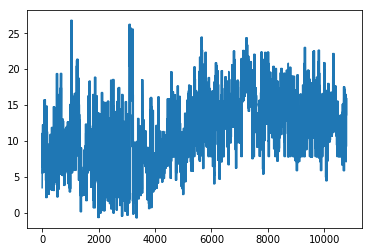

In [126]:
series_for_plot = pd.Series(final_prediction)
series_for_plot.plot(kind='line')

## Looking at prediction results

In [38]:
final_predictions  = pd.read_csv('C:\\Users\\limxu\\Documents\\Intern\\data\\notebooks\\final_prediction.txt', header = None)

print(final_predictions.head()
)

          0
0  3.460404
1  4.263534
2  7.049280
3  3.833583
4  3.642215


In [51]:
# taking the first 10795 data points

#check if I need only 17095 data points
img_folder_path = 'C:\\Users\\limxu\\Documents\\Intern\\data\\test_images'
dirListing = os.listdir(img_folder_path)
print(len(dirListing))

#cut
final_predictions = final_predictions[22:]
print(len(final_predictions))

10795
10772


In [42]:
filename="v2final_prediction.txt"
np.savetxt(filename, final_predictions, newline="\n", fmt ='%f')



10794


In [43]:
test = pd.read_csv('C:\\Users\\limxu\\Documents\\Intern\\data\\notebooks\\v2final_prediction.txt', header = None)
print(len(test))

print(test.head())

10794
          0
0  7.798023
1  7.798023
2  7.798023
3  7.798023
4  7.798023


0    11.990543
Name: 1222, dtype: float64


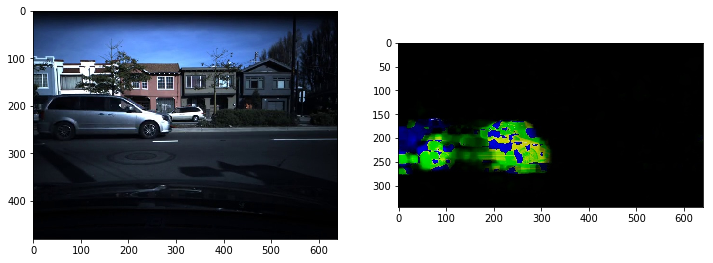

In [45]:
# Look at the frames where the car wasnt moving...

frame_num = 60*20
test_image_path = 'C:\\Users\\limxu\\Documents\\Intern\\data\\test_images\\frame' + str(frame_num) + '.jpg'
test_opticalflow_image_path = 'C:\\Users\\limxu\\Documents\\Intern\\data\\test_opticalflow_images\\frame' + str(frame_num) + '.jpg'


test_image = mpimg.imread(test_image_path)
test_opticalflow_image = mpimg.imread(test_opticalflow_image_path)
print(final_predictions.iloc[frame_num])

fig = plt.figure(figsize = (12,12))
fig.add_subplot(1,2, 1)
plt.imshow(test_image)
fig.add_subplot(1,2, 2)
plt.imshow(test_opticalflow_image)
plt.show(block=True)


#Do manual editing LOL

0    0.857038
Name: 1600, dtype: float64


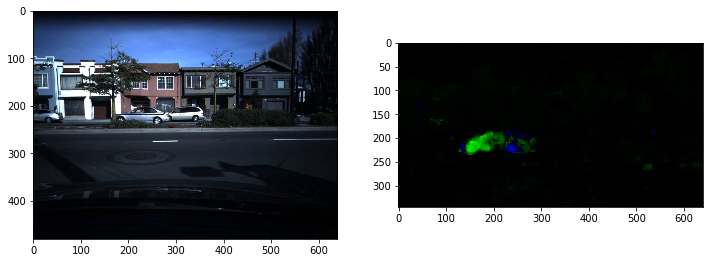

In [49]:
#check manual edits
post_edits = pd.read_csv('C:\\Users\\limxu\\Documents\\Intern\\data\\notebooks\\v2final_prediction.txt', header = None)

# Look at the frames where the car wasnt moving...

frame_num = 80*20
test_image_path = 'C:\\Users\\limxu\\Documents\\Intern\\data\\test_images\\frame' + str(frame_num) + '.jpg'
test_opticalflow_image_path = 'C:\\Users\\limxu\\Documents\\Intern\\data\\test_opticalflow_images\\frame' + str(frame_num) + '.jpg'


test_image = mpimg.imread(test_image_path)
test_opticalflow_image = mpimg.imread(test_opticalflow_image_path)
print(post_edits.iloc[frame_num])

fig = plt.figure(figsize = (12,12))
fig.add_subplot(1,2, 1)
plt.imshow(test_image)
fig.add_subplot(1,2, 2)
plt.imshow(test_opticalflow_image)
plt.show(block=True)

In [50]:
print(len(post_edits))

10794
